In [1]:
import tensorflow as tf
import numpy as np
import tensorflow.keras as keras
from tensorflow.image import resize

In [2]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocessing data
train_images = train_images / 255.

train_images = tf.reshape(train_images, (60000, 28, 28, 1))
train_labels = tf.reshape(train_labels, (60000, 1))
print(train_images.shape)
print(train_labels.shape)

(60000, 28, 28, 1)
(60000, 1)


In [3]:
train_labels

<tf.Tensor: shape=(60000, 1), dtype=uint8, numpy=
array([[5],
       [0],
       [4],
       ...,
       [5],
       [6],
       [8]], dtype=uint8)>

C:\Users\MINH LE\anaconda3\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


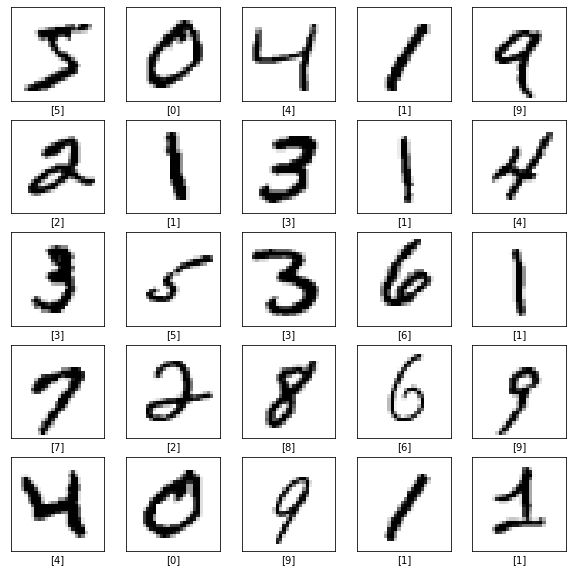

In [4]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels.numpy()[i])
plt.show()

In [5]:
# VGG 16 pre-trained
from keras.layers import Dense, AvgPool2D
from keras.layers import Flatten, Conv2D, BatchNormalization
from keras.models import Model
from keras.models import Sequential

IMG_SIZE = 28
IMG_CHANNEL = 1

# Le-Net
model = Sequential()
model.add(Conv2D(filters=6, kernel_size=5, activation='relu', padding='same', input_shape=(IMG_SIZE, IMG_SIZE, IMG_CHANNEL)))
model.add(BatchNormalization())
model.add(AvgPool2D(pool_size=2, strides=2))

model.add(Conv2D(filters=16, kernel_size=5, activation='relu'))
model.add(BatchNormalization())
model.add(AvgPool2D(pool_size=2, strides=2))

model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer = 'adam', 
               loss='sparse_categorical_crossentropy',
               metrics = ['accuracy'])

model.summary()

history_data = model.fit(train_images,
          train_labels, 
          epochs=10,
          batch_size=512)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 6)         24        
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
batch_normalization_1 (Batch (None, 10, 10, 16)        64        
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0

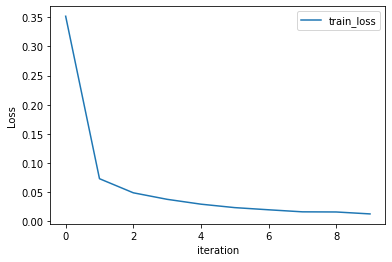

In [6]:
import matplotlib.pyplot as plt

plt.plot(history_data.history['loss'], label = "train_loss")
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.legend()

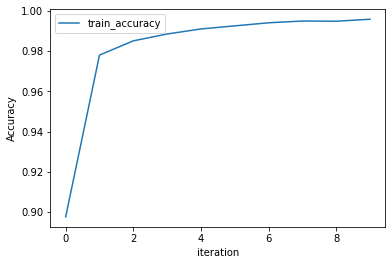

In [7]:
import matplotlib.pyplot as plt

plt.plot(history_data.history['accuracy'], label = "train_accuracy")
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()

In [8]:
model.save(r'C:\Users\MINH LE\Desktop\TraditionalvsCNN\Additional Experiments\mnist\models\model_mnist_t2.h5')